In [ ]:
# This is for downloading the dataset from kaggle 

import os
os.environ['KAGGLE_USERNAME'] = "jiyamalik"
os.environ['KAGGLE_KEY'] = "7dceb2ec41c6ec486095d093b886b443"
!kaggle competitions download -c dogs-vs-cats

 97% 529M/543M [00:10<00:00, 28.5MB/s]
100% 543M/543M [00:10<00:00, 55.0MB/s]
 93% 253M/271M [00:05<00:00, 44.7MB/s]
100% 271M/271M [00:05<00:00, 50.5MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 79.4MB/s]


In [ ]:
# This is for unzipping the file train.zip

from zipfile import ZipFile

filename = '/content/train.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()

In [ ]:
# It is used to print the number of images in the train_dataset

data_list = os.listdir('/content/train')
path, dirs, files = next(os.walk("/content/train"))
filecount = len(files)
print(filecount)

25000


In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [ ]:
# This is the creation of a new directory cats_dogs which will contain some data 
# of the originl train_dataset

original = '/content/train'
a = '/content/cats_dogs'
os.mkdir(a)

In [ ]:
# This is creating directories in the cats_dogs directory

train_dir = os.path.join(a, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(a, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(a, 'test')
os.mkdir(test_dir) 

In [ ]:
# This is further creating two directories joining the train directory

train_cats = os.path.join(train_dir, 'cats')
os.mkdir(train_cats)

train_dogs = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs)

In [ ]:
# This is further creating two directories joining the validation directory

validation_cats = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats)

validation_dogs = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs)

In [ ]:
# This is further creating two directories joining the test directory

test_cats = os.path.join(test_dir, 'cats')
os.mkdir(test_cats)

test_dogs = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs)

In [ ]:
import shutil

In [ ]:
# This is for copying 1000 images of cats from the original train dataset to the
# train_cats directory

images = ['cat.{}.jpg'.format(i) for i in range(1000)]
for x in images:
    y = os.path.join(original, x)
    z = os.path.join(train_cats, x)
    shutil.copyfile(y, z)

# This is for copying 1000 images of dogs from the original train dataset to the
# train_dogs directory

images = ['dog.{}.jpg'.format(i) for i in range(1000)]
for x in images:
    y = os.path.join(original,x)
    z = os.path.join(train_dogs,x)
    shutil.copyfile(y,z)

In [ ]:
# This is for copying 500 images of cats from the original train dataset to the
# validation_cats directory

images = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for x in images:
  y = os.path.join(original,x)
  z = os.path.join(validation_cats,x)
  shutil.copyfile(y,z)
  
# This is for copying 500 images of dogs from the original train dataset to the
# validation_dogs directory

images = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for x in images:
  y = os.path.join(original,x)
  z = os.path.join(validation_dogs,x)
  shutil.copyfile(y,z)  

In [ ]:
# This is for copying 500 images of cats from the original train dataset to the
# test_cats directory

images = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for x in images:
  y = os.path.join(original,x)
  z = os.path.join(test_cats,x)
  shutil.copyfile(y,z)

# This is for copying 500 images of dogs from the original train dataset to the
# test_dogs directory

images = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for x in images:
  y = os.path.join(original,x)
  z = os.path.join(test_dogs,x)
  shutil.copyfile(y,z)  

In [ ]:
train_cat_fnames = os.listdir(train_cats)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs)
train_dog_fnames.sort() 
print(train_dog_fnames[:5])

['cat.788.jpg', 'cat.135.jpg', 'cat.432.jpg', 'cat.224.jpg', 'cat.129.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [ ]:
len(os.listdir(validation_cats)) # This is simply for checking whether the
                                 # dataset is being copied correctly

500

In [ ]:
len(os.listdir(train_dogs))    # This is simply for checking whether the
                               # dataset is being copied correctly

1000

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2

In [ ]:
r,c = 2,2
image_index = 0

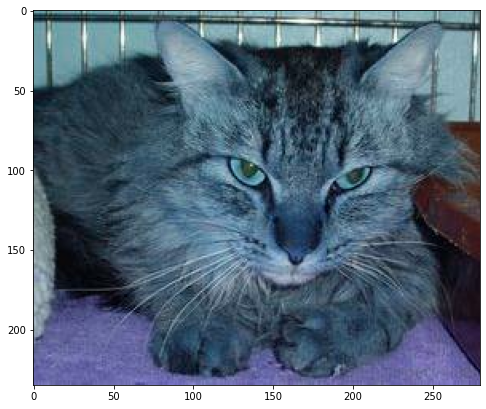

In [ ]:
#plt. gcf() allows to get a reference to the current figure when using pyplot
fig = plt.gcf()
fig.set_size_inches(c * 4, r * 4,1)  #This method is used to set the size to the image

image_index +=4 
cat = [os.path.join(train_cats, fname) 
                for fname in train_cat_fnames[image_index-4:image_index]]

img =cv2.imread(cat[2])
plt.imshow(img)

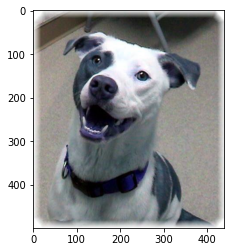

In [ ]:
image_index +=4 
dog = [os.path.join(train_dogs, fname) 
                for fname in train_dog_fnames[image_index-4:image_index]]

img =cv2.imread(dog[0])
plt.imshow(img)

I have used numpy and OpenCV for the data augmentation. I have tried to provide certain effects to the images like creating borders, flipping,blurring,resizing and adding noise to the images.

In [ ]:
BLACK = [0,0,0]
image_1 = cv2.imread(dog[0])
black_border_img = cv2.copyMakeBorder(image_1, 20,20,20,20, cv2.BORDER_CONSTANT, value=BLACK)

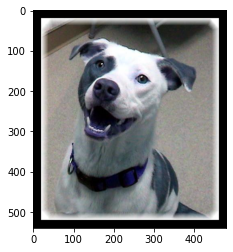

In [ ]:
plt.imshow(black_border_img)  

In [ ]:
# This is for resizing the image
img_1 = cv2.imread(dog[0])
 
print('Original Dimensions : ',img_1.shape)
 
scale_percent = 220 
width = int(img_1.shape[1] * scale_percent / 100)
height = int(img_1.shape[0] * scale_percent / 100)
dimensions = (width, height)
resized = cv2.resize(img_1, dimensions, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

img_2 = cv2.imread(cat[0])
 
print('Original Dimensions : ',img_2.shape)
 
scale_percent = 220 
width = int(img_2.shape[1] * scale_percent / 100)
height = int(img_2.shape[0] * scale_percent / 100)
dimensions = (width, height)
resized = cv2.resize(img_2, dimensions, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (500, 440, 3)
Resized Dimensions :  (1100, 968, 3)
Original Dimensions :  (375, 499, 3)
Resized Dimensions :  (825, 1097, 3)


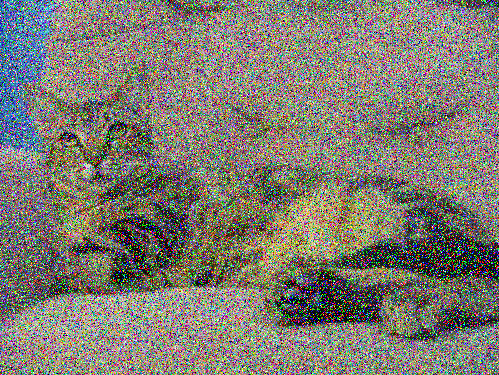

-1

In [ ]:
# This is for adding noise to the image
import cv2
import numpy as np
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
img1 = cv2.imread(cat[0])
 
# Adding salt-and-pepper noise to the image.
noise_img = random_noise(img1, mode='s&p',amount=0.3)

noise_img = np.array(255*noise_img, dtype = 'uint8')

cv2_imshow(noise_img)
cv2.waitKey(0)

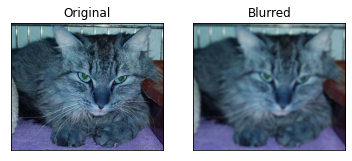

In [ ]:
image = cv2.imread(cat[2])

blur = cv2.blur(image,(5,5))

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

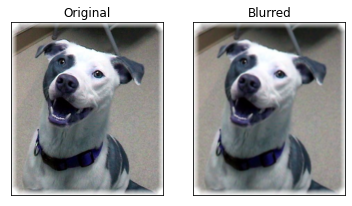

In [ ]:
image1 = cv2.imread(dog[0])

blur = cv2.blur(image1,(5,5))

plt.subplot(121),plt.imshow(image1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

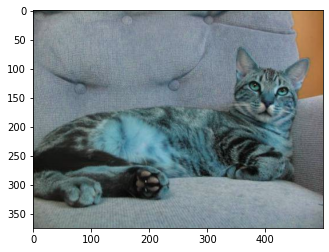

In [ ]:
# Flipping image with Numpy
image_3 = cv2.imread(cat[0])
flipped_img = np.fliplr(image_3)
plt.imshow(flipped_img)
plt.show()

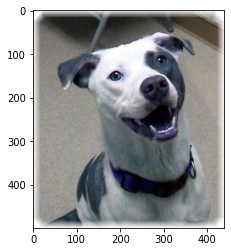

In [ ]:
image2 = cv2.imread(dog[0])
flipped_img = np.fliplr(image2)
plt.imshow(flipped_img)
plt.show()

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()  # creating a sequential model

In [ ]:
# adding the layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

In [ ]:
# compiling the model using RMSprop optimizer 
# As this is a binary classification task, using loss='binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# this is for rescaling the images   
train_g = ImageDataGenerator(rescale=1./255)  
test_g = ImageDataGenerator(rescale=1./255)  

In [ ]:
train_g = ImageDataGenerator(rescale=1./255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,) 

In [ ]:
train_gen = train_g.flow_from_directory(train_dir,target_size=(150, 150),
                                        batch_size=32,class_mode='binary')

validation_gen = test_g.flow_from_directory(validation_dir,target_size=(150, 150),
                                            batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# This is the fitting of the generator to train the model
history = model.fit_generator(train_gen,steps_per_epoch=100,epochs=50,
                              validation_data=validation_gen,
                              validation_steps=10) 

Epoch 1/50
100/100 [==============================] - 30s 300ms/step - loss: 0.6884 - acc: 0.5364 - val_loss: 0.5936 - val_acc: 0.5500
Epoch 2/50
100/100 [==============================] - 25s 246ms/step - loss: 0.6734 - acc: 0.5920 - val_loss: 0.6881 - val_acc: 0.6125
Epoch 3/50
100/100 [==============================] - 25s 246ms/step - loss: 0.6518 - acc: 0.6193 - val_loss: 0.6152 - val_acc: 0.6469
Epoch 4/50
100/100 [==============================] - 25s 253ms/step - loss: 0.6297 - acc: 0.6401 - val_loss: 0.6017 - val_acc: 0.6892
Epoch 5/50
100/100 [==============================] - 24s 238ms/step - loss: 0.6049 - acc: 0.6600 - val_loss: 0.5835 - val_acc: 0.6906
Epoch 6/50
100/100 [==============================] - 24s 242ms/step - loss: 0.5884 - acc: 0.6891 - val_loss: 0.7129 - val_acc: 0.6687
Epoch 7/50
100/100 [==============================] - 25s 247ms/step - loss: 0.5932 - acc: 0.6765 - val_loss: 0.4466 - val_acc: 0.7128
Epoch 8/50
100/100 [==============================] - 2

In [ ]:
from zipfile import ZipFile

test_filename = '/content/test1.zip'

with ZipFile(test_filename, 'r') as zip:
  zip.extractall()

In [ ]:
test_gen = test_g.flow_from_directory(test_dir,target_size=(150, 150),
                                        batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
prediction = model.predict_generator(test_gen)

In [ ]:
prediction

array([[0.9991854 ],
       [0.9467065 ],
       [0.17145838],
       [0.65773326],
       [0.08724443],
       [0.91193944],
       [0.14364079],
       [0.21923825],
       [0.2382753 ],
       [0.5945507 ],
       [0.9790602 ],
       [0.00973316],
       [0.86470157],
       [0.4861742 ],
       [0.52362496],
       [0.80462265],
       [0.08064743],
       [0.67899024],
       [0.70044655],
       [0.54383284],
       [0.4170044 ],
       [0.53744483],
       [0.89787287],
       [0.95508564],
       [0.84293395],
       [0.22621106],
       [0.90648824],
       [0.31954873],
       [0.97801274],
       [0.5007833 ],
       [0.5045091 ],
       [0.4684301 ],
       [0.7498385 ],
       [0.47693187],
       [0.8797431 ],
       [0.85972154],
       [0.7379762 ],
       [0.2657092 ],
       [0.7361386 ],
       [0.4829469 ],
       [0.23071675],
       [0.16251859],
       [0.47634983],
       [0.07148302],
       [0.888306  ],
       [0.32004127],
       [0.5090903 ],
       [0.143

In [ ]:
prediction[3]

array([0.65773326], dtype=float32)

In [ ]:
prediction[15]

array([0.80462265], dtype=float32)